<a href="https://colab.research.google.com/github/ErikGumilar/A-B-Testing-on-Marketing-Strategy/blob/main/AB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [1]:
# import pandas for data wrangling
import pandas as pd

# import numpy for vectorize data manipulation
import numpy as np

# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.pylab import rcParams

# import seaborn for data visualization
import seaborn as sns

# import stats module
from statsmodels.stats.power import TTestPower, TTestIndPower, GofChisquarePower
from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm

# import stats module of scipy
import scipy.stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Load Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_experiment/marketing-clean.csv', sep=',')

In [3]:
data

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
0,a100000040,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,1/18/18,House Ads,False,1
1,a100000041,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,2/22/18,House Ads,False,1
2,a100000042,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,3/9/18,House Ads,False,1
3,a100000043,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,2/18/18,House Ads,False,1
4,a100000044,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,3/3/18,House Ads,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,a100007286,1/17/18,Email,control,True,German,German,19-24 years,1/17/18,3/5/18,Email,False,1
573,a100007287,1/17/18,Email,control,True,German,German,24-30 years,1/17/18,2/14/18,Email,False,1
574,a100007288,1/17/18,Email,control,True,German,German,30-36 years,1/17/18,4/26/18,Email,False,1
575,a100007289,1/17/18,Email,control,True,German,German,36-45 years,1/17/18,1/27/18,Email,False,1


# Data Description

In [4]:
# data understanding and profilling
print("-"*20,"Data Understanding & Profilling","-"*20)
print("\n")

# data shape
print("There is", data.shape[0], "observation and", data.shape[1], "columns in this dataset")
print("\n")

# Data Information 
print("Data Info:", data.info())
print("\n")

# Numerical and Categorical Column
num = data.select_dtypes('number').columns
cat = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[num].columns}')
print('\n')
print(f'Categorical Columns: {data[cat].columns}')
print('\n')

# Statistical Summary of The Data
print("Statistical Description of Data:", data.describe())

-------------------- Data Understanding & Profilling --------------------


There is 577 observation and 13 columns in this dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              577 non-null    object
 1   date_served          577 non-null    object
 2   marketing_channel    577 non-null    object
 3   variant              577 non-null    object
 4   converted            577 non-null    bool  
 5   language_displayed   577 non-null    object
 6   language_preferred   577 non-null    object
 7   age_group            577 non-null    object
 8   date_subscribed      577 non-null    object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  577 non-null    object
 11  is_retained          577 non-null    bool  
 12  conversion           577 non-null    int64 
dtypes: bool(2), int64(1),

In [5]:
# unique value in dataset
for i in data.columns:
    print(F'{i}:',len(data[i].unique()))

print('\n')
    
# unique value details
for i in data[cat]:
    print(F'{i}: {data[i].unique()}')

user_id: 350
date_served: 31
marketing_channel: 5
variant: 2
converted: 2
language_displayed: 4
language_preferred: 4
age_group: 7
date_subscribed: 31
date_canceled: 115
subscribing_channel: 5
is_retained: 1
conversion: 2


user_id: ['a100000040' 'a100000041' 'a100000042' 'a100000043' 'a100000044'
 'a100000045' 'a100000046' 'a100000047' 'a100000048' 'a100000059'
 'a100000060' 'a100000061' 'a100000062' 'a100000063' 'a100000064'
 'a100000065' 'a100000066' 'a100000067' 'a100000088' 'a100000089'
 'a100000090' 'a100000091' 'a100000092' 'a100000093' 'a100000094'
 'a100000095' 'a100000096' 'a100000101' 'a100000102' 'a100000103'
 'a100000104' 'a100000105' 'a100000107' 'a100000108' 'a100000109'
 'a100000110' 'a100000164' 'a100000165' 'a100000166' 'a100000167'
 'a100000168' 'a100000169' 'a100000170' 'a100000171' 'a100000172'
 'a100000260' 'a100000261' 'a100000262' 'a100000263' 'a100000264'
 'a100000265' 'a100000266' 'a100000267' 'a100000268' 'a100000294'
 'a100000295' 'a100000296' 'a100000297' '

# Feature Engineering

In [6]:
# change date type column
data['date_served'] = pd.to_datetime(data['date_served'])
data['date_subscribed'] = pd.to_datetime(data['date_subscribed'])
data['date_canceled'] = pd.to_datetime(data['date_canceled'])

In [7]:
# change convertion rate into bool
data['conversion'] = data['conversion'].astype('bool')

In [8]:
# re-check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              577 non-null    object        
 1   date_served          577 non-null    datetime64[ns]
 2   marketing_channel    577 non-null    object        
 3   variant              577 non-null    object        
 4   converted            577 non-null    bool          
 5   language_displayed   577 non-null    object        
 6   language_preferred   577 non-null    object        
 7   age_group            577 non-null    object        
 8   date_subscribed      577 non-null    datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  577 non-null    object        
 11  is_retained          577 non-null    bool          
 12  conversion           577 non-null    bool          
dtypes: bool(3), datetime64[ns](3), obje

In [9]:
# check missing value
data.isnull().sum()

user_id                0
date_served            0
marketing_channel      0
variant                0
converted              0
language_displayed     0
language_preferred     0
age_group              0
date_subscribed        0
date_canceled          0
subscribing_channel    0
is_retained            0
conversion             0
dtype: int64

In [10]:
# check data duplicated
data.duplicated().sum()

2

In [11]:
# drop the duplicated value
data = data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [12]:
# check the dataframe shape and info
print(data.shape)
print(data.info())

(575, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 576
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              575 non-null    object        
 1   date_served          575 non-null    datetime64[ns]
 2   marketing_channel    575 non-null    object        
 3   variant              575 non-null    object        
 4   converted            575 non-null    bool          
 5   language_displayed   575 non-null    object        
 6   language_preferred   575 non-null    object        
 7   age_group            575 non-null    object        
 8   date_subscribed      575 non-null    datetime64[ns]
 9   date_canceled        575 non-null    datetime64[ns]
 10  subscribing_channel  575 non-null    object        
 11  is_retained          575 non-null    bool          
 12  conversion           575 non-null    bool          
dtypes: bool(3), datetime64[ns

In [13]:
data

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
0,a100000040,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,2018-01-18,House Ads,False,True
1,a100000041,2018-01-01,House Ads,personalization,True,Arabic,Arabic,24-30 years,2018-01-01,2018-02-22,House Ads,False,True
2,a100000042,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,2018-03-09,House Ads,False,True
3,a100000043,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,2018-02-18,House Ads,False,True
4,a100000044,2018-01-01,House Ads,personalization,True,Arabic,Arabic,24-30 years,2018-01-01,2018-03-03,House Ads,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,a100007286,2018-01-17,Email,control,True,German,German,19-24 years,2018-01-17,2018-03-05,Email,False,True
573,a100007287,2018-01-17,Email,control,True,German,German,24-30 years,2018-01-17,2018-02-14,Email,False,True
574,a100007288,2018-01-17,Email,control,True,German,German,30-36 years,2018-01-17,2018-04-26,Email,False,True
575,a100007289,2018-01-17,Email,control,True,German,German,36-45 years,2018-01-17,2018-01-27,Email,False,True


# Simple EDA

In [14]:
a_labels = ['House Ads','Instagram','Facebook','Email','Push']
b_labels = ['Instagram','House Ads','Facebook','Email','Push']

# create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=a_labels, values=data['marketing_channel'].value_counts(), name="Marketing Channel"),
              1, 1)
fig.add_trace(go.Pie(labels=b_labels, values=data['subscribing_channel'].value_counts(), name="Subscribing Channel"),
              1, 2)

# use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Marketing and Subscribing Distributions",
    # add annotations in the center of the donut pies.
    annotations=[dict(text='Marketing', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Subscribing', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [15]:
fig = px.histogram(data, x="marketing_channel", barmode="group", title="<b>Marketing Channel Distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(data, x="converted", color="marketing_channel", barmode="group", title="<b>Customer Conversion Distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [17]:
# customer variant value count and distribution
labels = data['variant'].unique()
values = data['variant'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35)])
fig.update_layout(title_text="<b>Customer Variant Distribution</b>")
fig.show()

In [18]:
# user converted per variant
fig = px.histogram(data, x="converted", color="variant", barmode="group", title="<b>Customer Conversion per Variant<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [19]:
# user converted on customer aged
fig = px.histogram(data, x="converted", color="age_group", barmode="group", title="<b>Customer Conversion per Variant<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [20]:
# user language preferred
fig = px.histogram(data, x="converted", color="language_preferred", barmode="group", title="<b>Customer Conversion per Variant<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [21]:
# customer retained value count and distribution
labels = data['converted'].unique()
values = data['converted'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35)])
fig.update_layout(title_text="<b>Customer Conversion Distribution</b>")
fig.show()

In [22]:
# create specific dataframe by grouping of datetypes
data_date = data.groupby(['date_subscribed','variant'], as_index=False).agg({
    'user_id': 'nunique',
    'conversion': 'sum'
})

In [23]:
# check new dataframe
data_date

,date_subscribed,variant,user_id,conversion
0,2018-01-01,control,2,0
1,2018-01-01,personalization,8,8
2,2018-01-02,control,3,1
3,2018-01-02,personalization,11,11
4,2018-01-03,control,4,2
...,...,...,...,...
57,2018-01-29,personalization,4,4
58,2018-01-30,control,3,2
59,2018-01-30,personalization,5,4
60,2018-01-31,control,3,1


In [24]:
import matplotlib.ticker as ticker

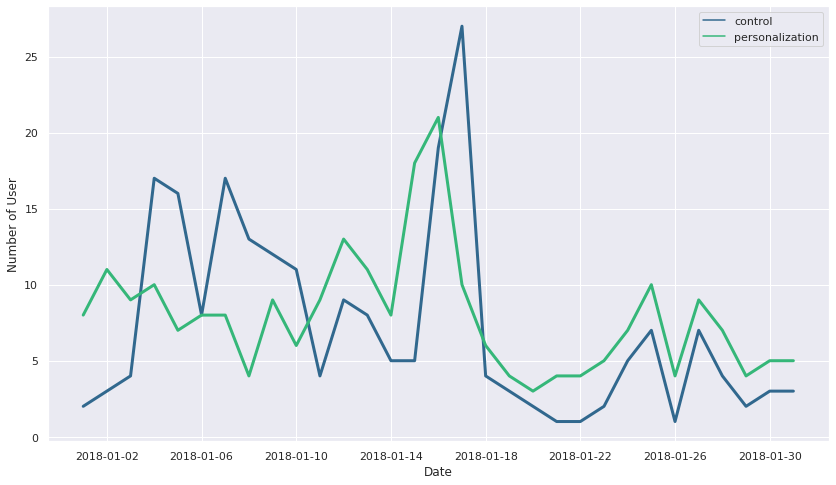

In [25]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=data_date, x ='date_subscribed', y = 'user_id',
                  hue='variant', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number of User')
plt.xlabel('Date')
plt.show()

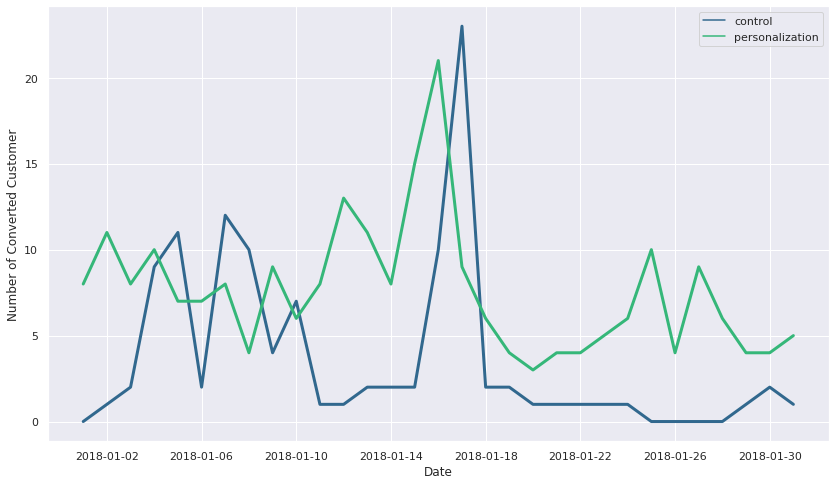

In [26]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=data_date, x ='date_subscribed', y = 'conversion',
                  hue='variant', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Number of Converted Customer')
plt.xlabel('Date')
plt.show()

# Power Analysis

In [27]:
# statistical measurement of samples
# initialize t-test power analysis object
analysis = GofChisquarePower()

result = analysis.solve_power(
    0.05, 
    alpha = 0.05,
    power = 0.8,
    n_bins = 2
)

In [28]:
# Calculate sample size
print('Sample Size: %.3f' % result)

Sample Size: 3139.544


# A/B Testing

In [29]:
def prop_agg(data, y, x):
  temp_df = data.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



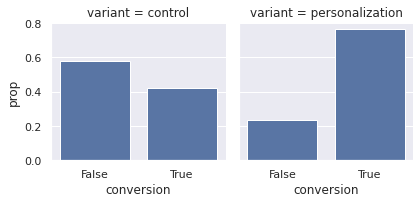

In [30]:
g = sns.FacetGrid(
    data = prop_agg(data, "variant", "conversion"),
    col = "variant"
)
g.map(sns.barplot, "conversion", "prop");

## Using Proportion Test (Chi-Square) for Count Data

In [31]:
conv_calculation = data.groupby(
    ['variant', 'conversion'], as_index = False
).size().pivot(
    index='variant', columns = "conversion", values = "size"
).reset_index().assign(
    conv_percent = lambda x: x[True] * 100 / (x[True] + x[False])
).assign(
    total_sample = lambda x: x[True] + x[False]
)

In [32]:
# check the new dataframe
conv_calculation

conversion,variant,False,True,conv_percent,total_sample
0,control,153,112,42.264151,265
1,personalization,73,237,76.451613,310


In [33]:
# uplift calculation of personalization of treat
conv_A = conv_calculation[conv_calculation['variant'] == 'control']['conv_percent'].values
conv_B = conv_calculation[conv_calculation['variant'] == 'personalization']['conv_percent'].values

In [34]:
# array
(conv_B - conv_A)*100/conv_A

array([80.88997696])

**Simple Interpretation:**

there are 80% uplift of comparison between control and personalization.

In [35]:
# chi-square
# find number of succession
success = conv_calculation[['total_sample', True]].values[:,1]
# find number of all observations
obs = conv_calculation[['total_sample', True]].values[:,0]

In [36]:
# function of chi-square
result = proportions_chisquare(success, obs)

In [37]:
# calculation of chi-square result
print('X-squared: %.3f' % result[0])
print('p-value: %.3f' % result[1])

X-squared: 69.996
p-value: 0.000


**Simple Interpretation:**

    1. Relative uplift of Personalization (69.99%) from control
    2. p-value computed is 0.000 < 0.05, hence there is strong statistical significance in test results. Then, we should reject null hypothesis and proceed to launch variant B for all users

# Linear Model

In [38]:
# select variant and converted columns
data_for_model = data[['variant', 'conversion']].copy()
# create dummy variables and remove first category ('variant_A')
data_for_model = pd.get_dummies(data_for_model, drop_first = True)
# add constant
data_for_model = sm.add_constant(data_for_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [39]:
# check data_for_model
data_for_model

,const,conversion,variant_personalization
0,1.0,True,1
1,1.0,True,1
2,1.0,True,1
3,1.0,True,1
4,1.0,True,1
...,...,...,...
572,1.0,True,0
573,1.0,True,0
574,1.0,True,0
575,1.0,True,0


In [40]:
# define and fit logistic regression model
# using statistical logistic regression
log_reg = sm.Logit(data_for_model['conversion'], data_for_model[['variant_personalization','const']]).fit()

Optimization terminated successfully.
         Current function value: 0.608179
         Iterations 5


In [41]:
# model summary
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                  575
Model:                          Logit   Df Residuals:                      573
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Jun 2022   Pseudo R-squ.:                 0.09239
Time:                        02:14:48   Log-Likelihood:                -349.70
converged:                       True   LL-Null:                       -385.30
Covariance Type:            nonrobust   LLR p-value:                 3.232e-17
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
variant_personalization     1.4895      0.183      8.153      0.000       1.131       1.848
const                      -0.3119      0.124     -2.508      0.012      -0.556      -0.068
===========================================================================================
"""

**Simple Interpretation:**

        1.We can observe uplift of variant Personalization around 148.95%. It's seems unreal but the conversion rate are completely jumped in the recorded data.
        2.Based on p-value = 0.000 < alpha = 0.05, hence there is strong statistical significance in test results. Then, we should reject null hypothesis and proceed to launch variant Personalization for all users.